In [1]:
import sklearn
import pandas as pd
import joblib
import dill
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from os.path import expanduser as ospath
from sklearn import svm
from sklearn import metrics
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.ensemble import RandomForestClassifier

In [15]:
# read all data
data_train = pd.read_csv("../Data/Data Set/Data Train/Data Train Pandas Correlation.csv")
data_test = pd.read_csv("../Data/Data Set/Data Test/Data Test.csv")
selective_deskriptor = joblib.load("../Data/selective_deskriptor (Iterasi 100x).pkl")
scaler = joblib.load("../Data/scaler.pkl")
position_optimal_features = joblib.load('../Data/position_optimal_features.pkl')
position_optimal_features

[4, 4, 5]

In [16]:
for i in selective_deskriptor:
    print(i)

['nBondsS2', 'ATS4i', 'GATS5s', 'TIC4', 'AATS1i']
['AMR', 'ATS6i', 'TIC5', 'GATS6s', 'GATS4s', 'ATS7v']
['Sse', 'ATS2v', 'ATS5p', 'GATS7s', 'McGowan_Volume', 'ZMIC1', 'WTPT-1']
['GATS3s', 'ATS2v', 'ATS0v', 'GATS8s', 'SpDiam_Dt', 'SIC2', 'Kier1', 'WTPT-1']
['CIC0', 'nBondsS3', 'AMR', 'IC0', 'GATS5s', 'SIC2', 'ATS2i', 'AMW', 'MW']
['AMR', 'SIC0', 'nC', 'Sv', 'BIC1', 'GATS4s', 'ATS0v', 'GATS8s', 'ATS8p', 'CrippenLogP']


In [5]:
# plot_corelation_20 = data_train.iloc[:,1:]
# plot_corelation_20
# ax = plot_corelation_20.plot.bar()

In [6]:
label_0 = []
label_1 = []
label_0.append(data_train[(data_train['Label'] != 1)].shape[0])
label_0.append(data_test[(data_test['Label'] != 1)].shape[0])
label_1.append(data_train[(data_train['Label'] != 0)].shape[0])
label_1.append(data_test[(data_test['Label'] != 0)].shape[0])
# train_0 = data_train[(data_train['Label'] != 1)]
# train_1 = data_train[(data_train['Label'] != 0)]
# test_0 = data_test[(data_test['Label'] != 1)]
# test_1 = data_test[(data_test['Label'] != 0)]
print(label_0)
print(label_1)

[2591, 1110]
[2590, 1111]


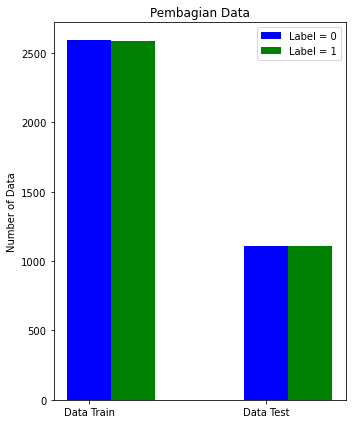

In [7]:
# Pembagian data train dan data test, dan label 0 maupun 1  
# fig, ax = plt.subplots(figsize=(5, 6))

# create plot
label = ['Data Train','Data Test']
fig, ax = plt.subplots(figsize=(5, 6))
index = np.arange(len(label))
bar_width = 0.25
# opacity = 0.8

bar1 = plt.bar(index, label_0, width=bar_width,
color='b',
label='Label = 0')

bar2 = plt.bar(index+bar_width, label_1, width=bar_width,
color='g',
label='Label = 1')

# plt.xlabel('Kernel')
plt.ylabel('Number of Data')
plt.title('Pembagian Data')
plt.xticks(index, label)
# plt.legend()
plt.legend(bbox_to_anchor=(1,1), loc='best')

plt.tight_layout()
plt.show()

In [8]:
# define x train and y train
# x_train --> 5-10 jenis fitur yg diambil, y_train --> label
X_train = data_train.iloc[:,1:] # kolom fitur
# Y_train = data_train.iloc[:,:1] # kolom label
X_train_scale = scaler.transform(X_train)
X_train_scale = pd.DataFrame(X_train_scale, columns=X_train.columns)
X_train_scale.head()

x_train = []
for i in range(len(selective_deskriptor)):
    # Get position (name column) every row selective_deskriptor
    value = X_train_scale.loc[:, selective_deskriptor[i]]
    x_train.append(value)

y_train = data_train.iloc[:,:1] # kolom label

             feature  bobot_importance
0                AMR          0.122842
1           nBondsS2          0.082661
3                 nH          0.063195
7             ATSC0v          0.052871
21             ATS4e          0.051021
..               ...               ...
62             ATS7p          0.000288
43             ATS8i          0.000269
74             ATS7v          0.000257
48                nC          0.000219
85  LipinskiFailures          0.000059

[99 rows x 2 columns]
     feature  bobot_importance
28      apol          0.024864
29       Spe          0.024944
20        Si          0.025625
38     ATS5e          0.025758
4   nBondsS3          0.026579
2       CIC0          0.028964
9      nAtom          0.042273
12     ATS2i          0.042300
18     ATS4i          0.042990
13     ATS2e          0.050033
21     ATS4e          0.051021
7     ATSC0v          0.052871
3         nH          0.063195
1   nBondsS2          0.082661
0        AMR          0.122842


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

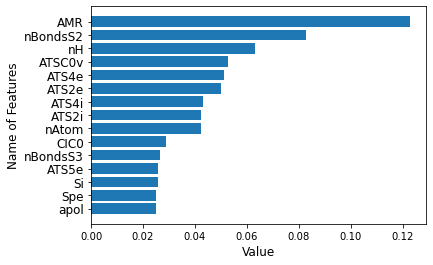

In [9]:
# # from sklearn.datasets import make_classification
# # from sklearn.ensemble import ExtraTreesClassifier

# #define model
# classifier = RandomForestClassifier()

# #fitting model
# classifier.fit(X_train, y_train)
# feat_importance = classifier.feature_importances_
# #make label dataframe
# tree_feature = {"feature": X_train.columns.values, "bobot_importance": feat_importance}
# df_importance = pd.DataFrame(tree_feature)
# df_importance.sort_values(by="bobot_importance", ascending=False, inplace=True)
# # print(df_importance)

# # get 15 only columns (already ascending)
# xoxo = df_importance.iloc[:15,:]
# xoxo.sort_values(by='bobot_importance', ascending=True, inplace=True)

# # plotting data feature importance
# # plt.figure(figsize = (8,8))
# plt.barh(xoxo.feature, xoxo.bobot_importance)
# plt.xlabel('Value', fontsize = 12)
# plt.ylabel('Name of Features', fontsize = 12)
# plt.yticks(fontsize = 12)
# # plt.title('Feature Importances', fontsize = 20)

In [9]:
# define x test and y test
# x_test --> 5-10 jenis fitur yg diambil, y_test --> label
column_pandas_corr = data_train.columns
X_test = data_test.loc[:, column_pandas_corr]
y_test = X_test.iloc[:,:1] # kolom label

X_test = X_test.iloc[:,1:]
X_test_scale = scaler.transform(X_test)
X_test_scale = pd.DataFrame(X_test_scale, columns=X_test.columns)
X_test_scale.head()

x_test = []
for i in range(len(selective_deskriptor)):
    # Get position (name column) every row selective_deskriptor
    value = X_test_scale.loc[:, selective_deskriptor[i]]
    x_test.append(value)

In [10]:
# # define x test and y test
# # x_test --> 5-10 jenis fitur yg diambil, y_test --> label
# x_test = []
# for i in range(len(selective_deskriptor)):
#     # Get position (name column) every row selective_deskriptor
#     value = data_test.loc[:, selective_deskriptor[i]]

#     # Feature Scaler Using StandarScaler()
#     # scaler.fit(value)
#     x_test_scale = scaler.transform(value)

#     # Convert the NumPy Array scale_x_test to DataFrame
#     x_test_scale = pd.DataFrame(x_test_scale, columns=value.columns) 

#     x_test.append(x_test_scale)

# y_test = data_test.iloc[:,-1]

In [11]:
# Get real accuracy using real data train and test
# with position --> using optimal features
# Tanpa tuning
name_kernel = 'linear', 'poly', 'rbf'
best_wo_hp_test = []
best_wo_hp_train = []
i = 0

Data Train
classfication report train : 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98      2591
           1       0.97      0.99      0.98      2590

    accuracy                           0.98      5181
   macro avg       0.98      0.98      0.98      5181
weighted avg       0.98      0.98      0.98      5181

--------------------------------------------------------------------------

Score / accuracy train   :  0.9808917197452229
Nilai Precision          :  0.9684091763820986
Nilai Recall             :  0.9942084942084942
Nilai F1                 :  0.9811392646218328
Nilai ROC AUC            :  0.9808942895588978


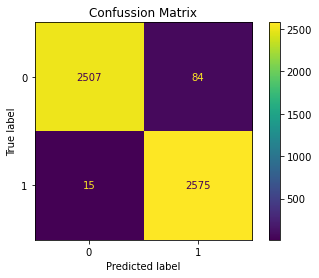

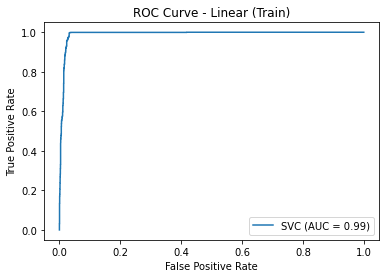

In [12]:
# without tuning each kernel (data train & data test) - linear part 1

position = position_optimal_features[i]
# train the model on train set without using GridSearchCV 
model = svm.SVC(kernel = name_kernel[i]) 
model.fit(x_train[position], y_train)

print('Data Train')
# prediction train  
predictions = model.predict(x_train[position]) 

# print classfication report
print('classfication report train : \n', classification_report(y_train, predictions))

# print and save accuracy score train
score_train = accuracy_score(y_train, predictions)
best_wo_hp_train.append(score_train)
print('--------------------------------------------------------------------------\n')
print('Score / accuracy train   : ', score_train)

# print precision
nilai_precision = precision_score(y_train, predictions)
print('Nilai Precision          : ', nilai_precision)

# print recall
nilai_recall = recall_score(y_train, predictions)
print('Nilai Recall             : ', nilai_recall)

# print f1 score
nilai_f1 = f1_score(y_train, predictions)
print('Nilai F1                 : ', nilai_f1)

# print roc score
nilai_roc = roc_auc_score(y_train, predictions)
print('Nilai ROC AUC            : ', nilai_roc)

# plot confusion matrix
plot_conmat = plot_confusion_matrix(model, x_train[position], y_train)
plt.title('Confussion Matrix')
plt.show()

# plot ROC curve
metrics.plot_roc_curve(model, x_train[position], y_train)  
plt.title('ROC Curve - Linear (Train)')
plt.show()

Data Test
classfication report train : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      1110
           1       0.97      1.00      0.99      1111

    accuracy                           0.99      2221
   macro avg       0.99      0.99      0.99      2221
weighted avg       0.99      0.99      0.99      2221

--------------------------------------------------------------------------

Score / accuracy train   :  0.985141828005403
Nilai Precision          :  0.9744718309859155
Nilai Recall             :  0.9963996399639964
Nilai F1                 :  0.9853137516688919
Nilai ROC AUC            :  0.9851367569189351


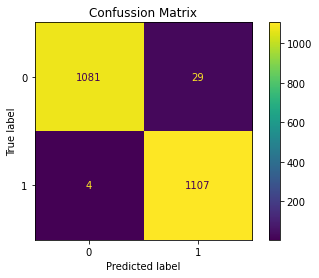

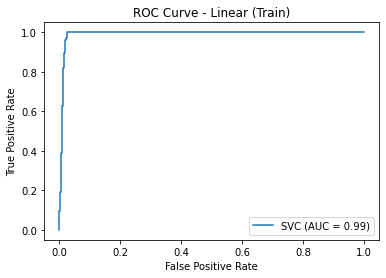

In [13]:
# without tuning each kernel (data train & data test) - linear part 2

print('Data Test')
# prediction train  
predictions = model.predict(x_test[position]) 

# print classfication report
print('classfication report train : \n', classification_report(y_test, predictions))

# print and save accuracy score train
score_test = accuracy_score(y_test, predictions)
best_wo_hp_test.append(score_test)
print('--------------------------------------------------------------------------\n')
print('Score / accuracy train   : ', score_test)

# print precision
nilai_precision = precision_score(y_test, predictions)
print('Nilai Precision          : ', nilai_precision)

# print recall
nilai_recall = recall_score(y_test, predictions)
print('Nilai Recall             : ', nilai_recall)

# print f1 score
nilai_f1 = f1_score(y_test, predictions)
print('Nilai F1                 : ', nilai_f1)

# print roc score
nilai_roc = roc_auc_score(y_test, predictions)
print('Nilai ROC AUC            : ', nilai_roc)

# plot confusion matrix
plot_conmat = plot_confusion_matrix(model, x_test[position], y_test)
plt.title('Confussion Matrix')
plt.show()

# plot ROC curve
metrics.plot_roc_curve(model, x_test[position], y_test)  
plt.title('ROC Curve - Linear (Train)')
plt.show()

i+=1

Data Train
classfication report train : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      2591
           1       0.97      1.00      0.98      2590

    accuracy                           0.98      5181
   macro avg       0.98      0.98      0.98      5181
weighted avg       0.98      0.98      0.98      5181

--------------------------------------------------------------------------

Score / accuracy train   :  0.9837869137232195
Nilai Precision          :  0.9706987227648385
Nilai Recall             :  0.9976833976833976
Nilai F1                 :  0.9840060929169839
Nilai ROC AUC            :  0.9837895954067316


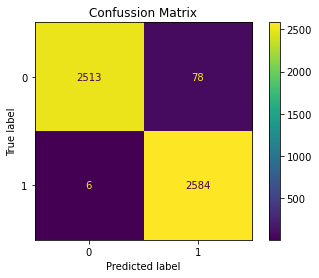

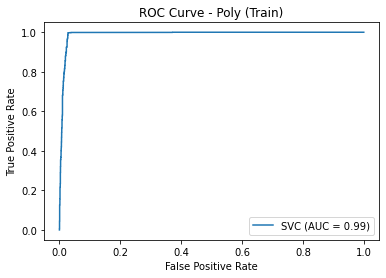

In [14]:
# without tuning each kernel (data train & data test) - poly part 1

position = position_optimal_features[i]
# train the model on train set without using GridSearchCV 
model = svm.SVC(kernel = name_kernel[i]) 
model.fit(x_train[position], y_train)

print('Data Train')
# prediction train  
predictions = model.predict(x_train[position]) 

# print classfication report
print('classfication report train : \n', classification_report(y_train, predictions))

# print and save accuracy score train
score_train = accuracy_score(y_train, predictions)
best_wo_hp_train.append(score_train)
print('--------------------------------------------------------------------------\n')
print('Score / accuracy train   : ', score_train)

# print precision
nilai_precision = precision_score(y_train, predictions)
print('Nilai Precision          : ', nilai_precision)

# print recall
nilai_recall = recall_score(y_train, predictions)
print('Nilai Recall             : ', nilai_recall)

# print f1 score
nilai_f1 = f1_score(y_train, predictions)
print('Nilai F1                 : ', nilai_f1)

# print roc score
nilai_roc = roc_auc_score(y_train, predictions)
print('Nilai ROC AUC            : ', nilai_roc)

# plot confusion matrix
plot_conmat = plot_confusion_matrix(model, x_train[position], y_train)
plt.title('Confussion Matrix')
plt.show()

# plot ROC curve
metrics.plot_roc_curve(model, x_train[position], y_train)  
plt.title('ROC Curve - Poly (Train)')
plt.show()

Data Test
classfication report train : 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99      1110
           1       0.98      1.00      0.99      1111

    accuracy                           0.99      2221
   macro avg       0.99      0.99      0.99      2221
weighted avg       0.99      0.99      0.99      2221

--------------------------------------------------------------------------

Score / accuracy train   :  0.9869428185502026
Nilai Precision          :  0.9762323943661971
Nilai Recall             :  0.9981998199819982
Nilai F1                 :  0.9870939029817535
Nilai ROC AUC            :  0.986937747828837


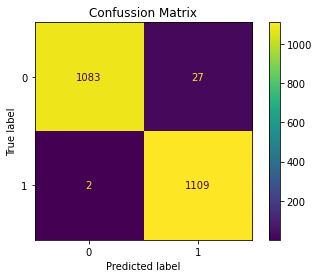

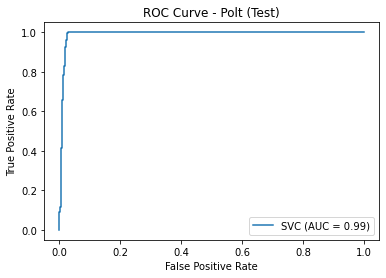

In [15]:
# without tuning each kernel (data train & data test) - poly part 2

print('Data Test')
# prediction train  
predictions = model.predict(x_test[position]) 

# print classfication report
print('classfication report train : \n', classification_report(y_test, predictions))

# print and save accuracy score train
score_test = accuracy_score(y_test, predictions)
best_wo_hp_test.append(score_test)
print('--------------------------------------------------------------------------\n')
print('Score / accuracy train   : ', score_test)

# print precision
nilai_precision = precision_score(y_test, predictions)
print('Nilai Precision          : ', nilai_precision)

# print recall
nilai_recall = recall_score(y_test, predictions)
print('Nilai Recall             : ', nilai_recall)

# print f1 score
nilai_f1 = f1_score(y_test, predictions)
print('Nilai F1                 : ', nilai_f1)

# print roc score
nilai_roc = roc_auc_score(y_test, predictions)
print('Nilai ROC AUC            : ', nilai_roc)

# plot confusion matrix
plot_conmat = plot_confusion_matrix(model, x_test[position], y_test)
plt.title('Confussion Matrix')
plt.show()

# plot ROC curve
metrics.plot_roc_curve(model, x_test[position], y_test)  
plt.title('ROC Curve - Polt (Test)')
plt.show()

i+=1

Data Train
classfication report train : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      2591
           1       0.97      1.00      0.98      2590

    accuracy                           0.98      5181
   macro avg       0.98      0.98      0.98      5181
weighted avg       0.98      0.98      0.98      5181

--------------------------------------------------------------------------

Score / accuracy train   :  0.9834008878594865
Nilai Precision          :  0.968562874251497
Nilai Recall             :  0.9992277992277993
Nilai F1                 :  0.98365640440897
Nilai ROC AUC            :  0.9834039420685505


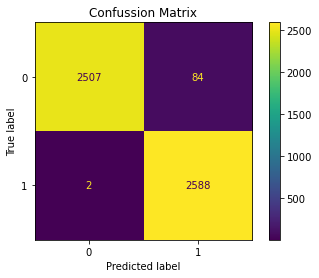

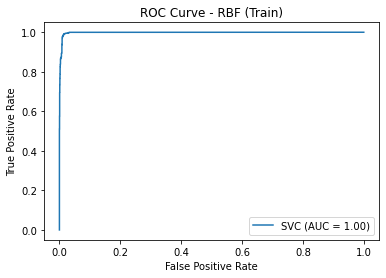

In [16]:
# without tuning each kernel (data train & data test) - rbf part 1

position = position_optimal_features[i]
# train the model on train set without using GridSearchCV 
model = svm.SVC(kernel = name_kernel[i]) 
model.fit(x_train[position], y_train)

print('Data Train')
# prediction train  
predictions = model.predict(x_train[position]) 

# print classfication report
print('classfication report train : \n', classification_report(y_train, predictions))

# print and save accuracy score train
score_train = accuracy_score(y_train, predictions)
best_wo_hp_train.append(score_train)
print('--------------------------------------------------------------------------\n')
print('Score / accuracy train   : ', score_train)

# print precision
nilai_precision = precision_score(y_train, predictions)
print('Nilai Precision          : ', nilai_precision)

# print recall
nilai_recall = recall_score(y_train, predictions)
print('Nilai Recall             : ', nilai_recall)

# print f1 score
nilai_f1 = f1_score(y_train, predictions)
print('Nilai F1                 : ', nilai_f1)

# print roc score
nilai_roc = roc_auc_score(y_train, predictions)
print('Nilai ROC AUC            : ', nilai_roc)

# plot confusion matrix
plot_conmat = plot_confusion_matrix(model, x_train[position], y_train)
plt.title('Confussion Matrix')
plt.show()

# plot ROC curve
metrics.plot_roc_curve(model, x_train[position], y_train)  
plt.title('ROC Curve - RBF (Train)')
plt.show()

Data Test
classfication report train : 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99      1110
           1       0.97      1.00      0.99      1111

    accuracy                           0.99      2221
   macro avg       0.99      0.99      0.99      2221
weighted avg       0.99      0.99      0.99      2221

--------------------------------------------------------------------------

Score / accuracy train   :  0.9869428185502026
Nilai Precision          :  0.974561403508772
Nilai Recall             :  1.0
Nilai F1                 :  0.9871168369613506
Nilai ROC AUC            :  0.986936936936937


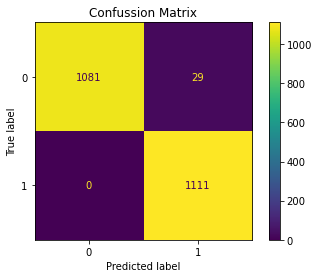

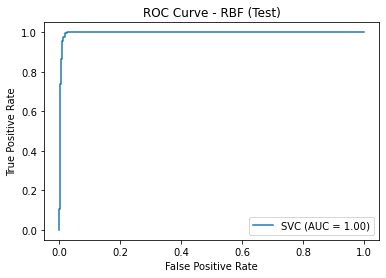

In [17]:
# without tuning each kernel (data train & data test) - rbf part 2

print('Data Test')
# prediction train  
predictions = model.predict(x_test[position]) 

# print classfication report
print('classfication report train : \n', classification_report(y_test, predictions))

# print and save accuracy score train
score_test = accuracy_score(y_test, predictions)
best_wo_hp_test.append(score_test)
print('--------------------------------------------------------------------------\n')
print('Score / accuracy train   : ', score_test)

# print precision
nilai_precision = precision_score(y_test, predictions)
print('Nilai Precision          : ', nilai_precision)

# print recall
nilai_recall = recall_score(y_test, predictions)
print('Nilai Recall             : ', nilai_recall)

# print f1 score
nilai_f1 = f1_score(y_test, predictions)
print('Nilai F1                 : ', nilai_f1)

# print roc score
nilai_roc = roc_auc_score(y_test, predictions)
print('Nilai ROC AUC            : ', nilai_roc)

# plot confusion matrix
plot_conmat = plot_confusion_matrix(model, x_test[position], y_test)
plt.title('Confussion Matrix')
plt.show()

# plot ROC curve
metrics.plot_roc_curve(model, x_test[position], y_test)  
plt.title('ROC Curve - RBF (Test)')
plt.show()

i+=1

In [18]:
print(best_wo_hp_train)
print(best_wo_hp_test)

[0.9808917197452229, 0.9837869137232195, 0.9834008878594865]
[0.985141828005403, 0.9869428185502026, 0.9869428185502026]


In [19]:
# save session 
import dill
dill.dump_session('../Data/SVM - part 2.db')

In [20]:
# load session 
import dill
dill.load_session('../Data/SVM - part 2.db')

In [ ]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs


# we create 40 separable points
X, y = make_blobs(n_samples=30, centers=2, random_state=3)

# fit the model, don't regularize for illustration purposes
clf = svm.SVC(kernel='linear', C=1)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=80, cmap=plt.cm.Paired)

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])
# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')
plt.show()